Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [2]:
dataset=pd.read_csv(r'H:\Formatted\HR\train.csv')

In [3]:
dataset.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


Data Preprocessing Stage

In [4]:
df=dataset.drop(['employee_id'],axis=1)

In [5]:
dataset.shape

(54808, 14)

In [6]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
# Let's drop all NA for now.
df=df.dropna()

In [8]:
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006
age,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412
previous_year_rating,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715
length_of_service,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267
KPIs_met >80%,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933
awards_won?,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971
avg_training_score,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494
is_promoted,-0.025006,-0.022412,0.158715,-0.014267,0.219933,0.196971,0.179494,1.000000


In [10]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


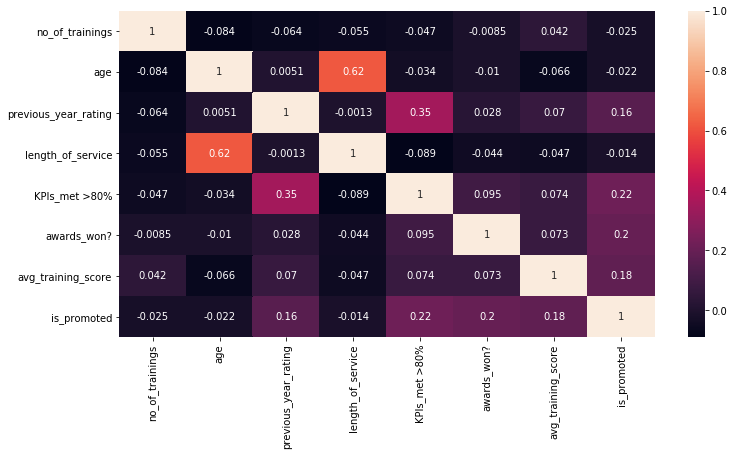

In [11]:
plt.figure(figsize=(12,6))
cmap=df.corr()
sns.heatmap(cmap,annot=True)

Looking at correlation or heat map graph, we can see there is not any variable which is strongly correlated to any other.

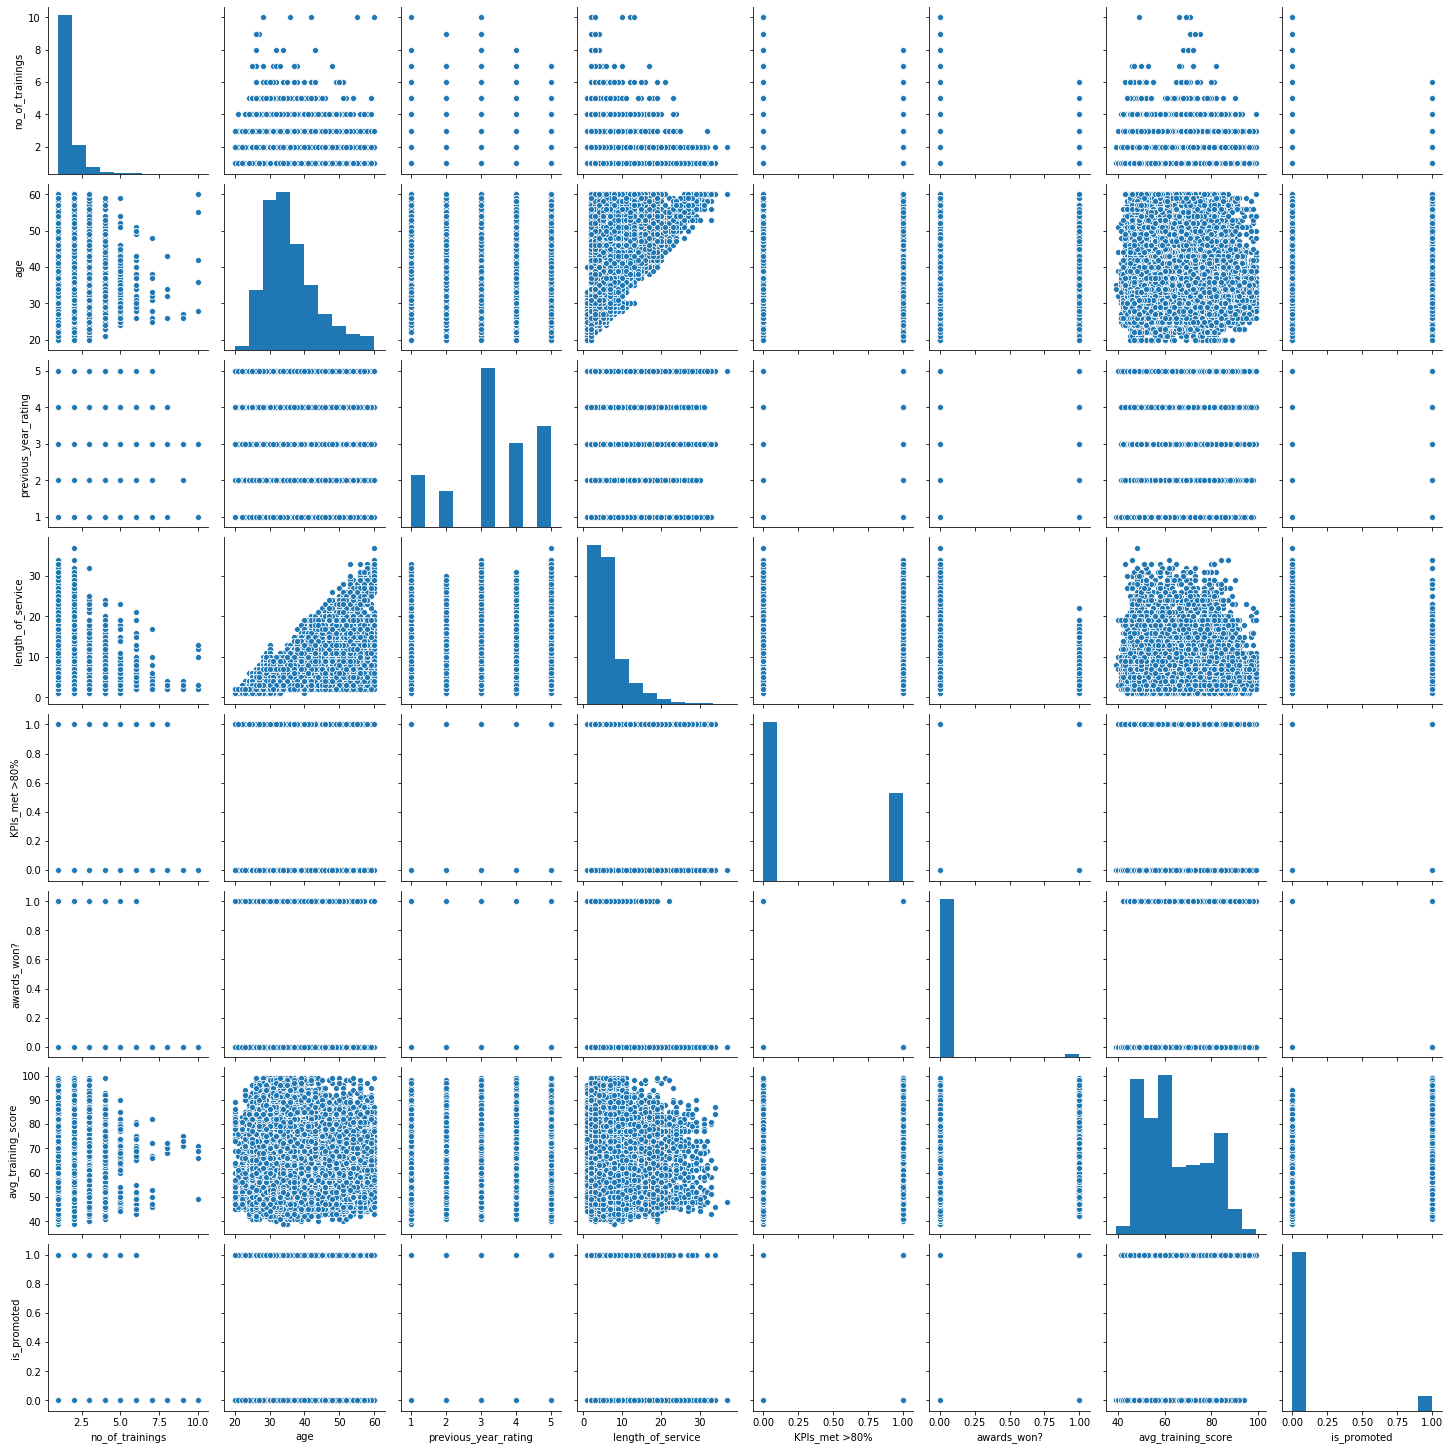

In [12]:
sns.pairplot(df)

Text(0, 0.5, 'is_promoted')

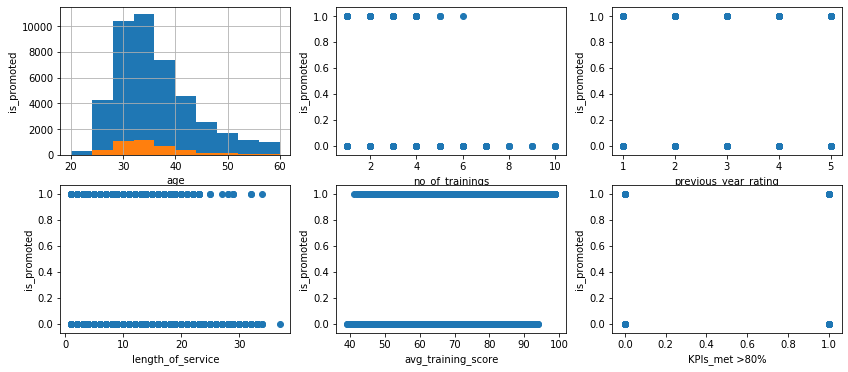

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
#df.groupby('is_promoted').age.plot(kind='kde')
df.groupby('is_promoted').age.hist()
#plt.scatter(df['age'],df['is_promoted'])
plt.xlabel('age')
plt.ylabel('is_promoted')

plt.subplot(2,3,2)
#df.groupby('is_promoted').no_of_trainings.plot(kind='kde')
plt.scatter(df['no_of_trainings'],df['is_promoted'])
plt.xlabel('no_of_trainings')
plt.ylabel('is_promoted')

plt.subplot(2,3,3)
plt.scatter(df['previous_year_rating'],df['is_promoted'])
plt.xlabel('previous_year_rating')
plt.ylabel('is_promoted')

plt.subplot(2,3,4)
plt.scatter(df['length_of_service'],df['is_promoted'])
plt.xlabel('length_of_service')
plt.ylabel('is_promoted')

plt.subplot(2,3,5)
plt.scatter(df['avg_training_score'],df['is_promoted'])
plt.xlabel('avg_training_score')
plt.ylabel('is_promoted')

plt.subplot(2,3,6)
plt.scatter(df['KPIs_met >80%'],df['is_promoted'])
plt.xlabel('KPIs_met >80%')
plt.ylabel('is_promoted')

In [14]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [15]:
pd.pivot_table(df, values='is_promoted', index=['gender'], aggfunc=np.sum)

,is_promoted
gender,
f,1363
m,2869


In [16]:
pd.pivot_table(df, values='is_promoted', index=['education'], aggfunc=np.sum)

,is_promoted
education,
Bachelor's,2733
Below Secondary,36
Master's & above,1463


In [17]:
df['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

We can see that this data is not balanced. Frequency of 0 is much more than frequency of 1.

In [18]:
df['education'].value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

In [19]:
pd.pivot_table(df, values='is_promoted',index=['education'], aggfunc=np.sum)

,is_promoted
education,
Bachelor's,2733
Below Secondary,36
Master's & above,1463


In [20]:
df.pivot_table(values='is_promoted',index=["education","gender"],columns='department',margins=True,aggfunc='count')

department               Analytics  Finance      HR  Legal  Operations  \
education        gender                                                  
Bachelor's       f           385.0    448.0   544.0   94.0      2993.0   
                 m          3204.0   1210.0   799.0  577.0      4305.0   
Below Secondary  f             NaN     19.0    33.0    6.0        32.0   
                 m             NaN     47.0    35.0   34.0        67.0   
Master's & above f            40.0    122.0   319.0   22.0      1355.0   
                 m           981.0    373.0   412.0  134.0      1795.0   
All                         4610.0   2219.0  2142.0  867.0     10547.0   

department               Procurement    R&D  Sales & Marketing  Technology  \
education        gender                                                      
Bachelor's       f            1849.0   32.0             1899.0      1645.0   
                 m            2191.0  463.0             8209.0      2557.0   
Below Secondary  f              29.0    NaN                NaN        44.0   
                 m              40.0    NaN                NaN        72.0   
Master's & above f            1181.0   19.0              859.0       839.0   
                 m            1351.0  379.0             3272.0      1345.0   
All                           6641.0  893.0            14239.0      6502.0   

department                 All  
education        gender         
Bachelor's       f        9889  
                 m       23515  
Below Secondary  f         163  
                 m         295  
Master's & above f        4756  
                 m       10042  
All                      48660

In [21]:
df.pivot_table(values='is_promoted',index=["education","gender"],columns='department',margins=True,aggfunc='sum')

department               Analytics  Finance     HR  Legal  Operations  \
education        gender                                                 
Bachelor's       f            50.0     35.0   26.0    4.0       264.0   
                 m           282.0     98.0   36.0   30.0       355.0   
Below Secondary  f             NaN      1.0    1.0    0.0         2.0   
                 m             NaN      5.0    4.0    2.0         2.0   
Master's & above f             3.0     11.0   26.0    1.0       158.0   
                 m           110.0     32.0   28.0    5.0       198.0   
All                          445.0    182.0  121.0   42.0       979.0   

department               Procurement   R&D  Sales & Marketing  Technology  \
education        gender                                                     
Bachelor's       f             194.0   2.0              102.0       174.0   
                 m             160.0  31.0              617.0       273.0   
Below Secondary  f               2.0   NaN                NaN         5.0   
                 m               2.0   NaN                NaN        10.0   
Master's & above f             173.0   3.0               53.0        73.0   
                 m             120.0  22.0              288.0       159.0   
All                            651.0  58.0             1060.0       694.0   

department                All  
education        gender        
Bachelor's       f        851  
                 m       1882  
Below Secondary  f         11  
                 m         25  
Master's & above f        501  
                 m        962  
All                      4232

In [22]:
df.pivot_table(values='gender',index=["is_promoted"],columns='region',margins=True,aggfunc='count')

region,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9,All
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,498,566,1121,399,2247,713,2305,1227,642,23,...,736,250,245,1387,659,553,3920,527,316,44428
1,55,48,68,26,216,57,207,92,100,1,...,37,10,8,239,31,26,477,51,8,4232
All,553,614,1189,425,2463,770,2512,1319,742,24,...,773,260,253,1626,690,579,4397,578,324,48660


In [23]:
df.pivot_table(values='gender',index=["is_promoted"],columns='recruitment_channel',margins=True,aggfunc='count')

recruitment_channel,other,referred,sourcing,All
is_promoted,,,,
0,24714,890,18824,44428
1,2303,130,1799,4232
All,27017,1020,20623,48660


In [24]:
df.pivot_table(values='gender',index=["is_promoted"],columns='education',margins=True,aggfunc='count')

education,Bachelor's,Below Secondary,Master's & above,All
is_promoted,,,,
0,30671,422,13335,44428
1,2733,36,1463,4232
All,33404,458,14798,48660


In [25]:
df.pivot_table(values='gender',index=["is_promoted"],columns='department',margins=True,aggfunc='count')

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,All
is_promoted,,,,,,,,,,
0,4165,2037,2021,825,9568,5990,835,13179,5808,44428
1,445,182,121,42,979,651,58,1060,694,4232
All,4610,2219,2142,867,10547,6641,893,14239,6502,48660


In [26]:
col=['department','education','region','recruitment_channel','avg_training_score','KPIs_met >80%','previous_year_rating','no_of_trainings']
for i in  range (0,len(col)):
    print(col[i])
    print(df.pivot_table(values='gender',index=["is_promoted"],columns=col[i],margins=True,aggfunc='count'))
    print(' \n\n ')
   
    

department
department   Analytics  Finance    HR  Legal  Operations  Procurement  R&D  \
is_promoted                                                                  
0                 4165     2037  2021    825        9568         5990  835   
1                  445      182   121     42         979          651   58   
All               4610     2219  2142    867       10547         6641  893   

department   Sales & Marketing  Technology    All  
is_promoted                                        
0                        13179        5808  44428  
1                         1060         694   4232  
All                      14239        6502  48660  
 

 
education
education    Bachelor's  Below Secondary  Master's & above    All
is_promoted                                                      
0                 30671              422             13335  44428
1                  2733               36              1463   4232
All               33404              458             14798 

In [27]:
df=df.drop(['recruitment_channel'],axis=1)

In [28]:
df

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,1,27,5.0,3,1,0,79,0


Text(0, 0.5, 'is_promoted')

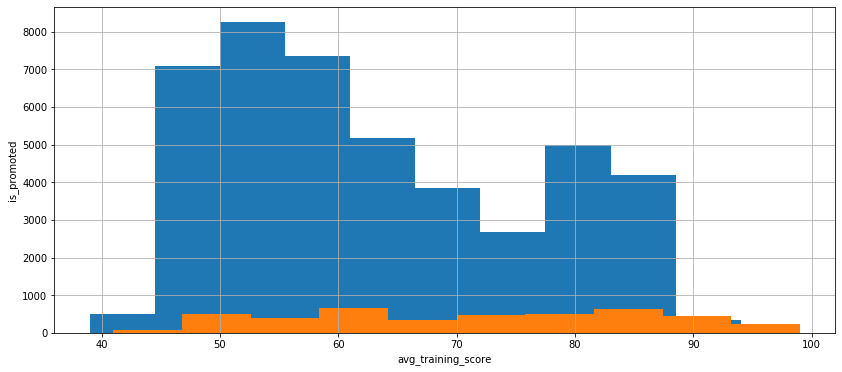

In [29]:
plt.figure(figsize=(14,6))
#df.groupby('is_promoted').age.plot(kind='kde')
df.groupby('is_promoted').avg_training_score.hist()
#plt.scatter(df['age'],df['is_promoted'])
plt.xlabel('avg_training_score')
plt.ylabel('is_promoted')


In [30]:
df.pivot_table(values='gender',index=["is_promoted"],columns='avg_training_score',margins=True,aggfunc='count')

avg_training_score,39,40,41,42,43,44,45,46,47,48,...,91,92,93,94,95,96,97,98,99,All
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,2.0,4.0,23.0,51.0,144.0,275.0,542.0,935.0,1424.0,1999.0,...,37.0,14.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,44428
1,NaN,NaN,1.0,2.0,6.0,9.0,27.0,33.0,68.0,82.0,...,71.0,76.0,69.0,54.0,40.0,42.0,39.0,32.0,34.0,4232
All,2.0,4.0,24.0,53.0,150.0,284.0,569.0,968.0,1492.0,2081.0,...,108.0,90.0,76.0,56.0,40.0,42.0,39.0,32.0,34.0,48660


In [31]:
col=['department','education','region','avg_training_score','KPIs_met >80%','previous_year_rating','no_of_trainings']
for i in  range (0,len(col)):
    print(col[i])
    print(df.pivot_table(values='gender',index=["is_promoted"],columns=col[i],margins=True,aggfunc='count'))
    print(' \n\n ')

department
department   Analytics  Finance    HR  Legal  Operations  Procurement  R&D  \
is_promoted                                                                  
0                 4165     2037  2021    825        9568         5990  835   
1                  445      182   121     42         979          651   58   
All               4610     2219  2142    867       10547         6641  893   

department   Sales & Marketing  Technology    All  
is_promoted                                        
0                        13179        5808  44428  
1                         1060         694   4232  
All                      14239        6502  48660  
 

 
education
education    Bachelor's  Below Secondary  Master's & above    All
is_promoted                                                      
0                 30671              422             13335  44428
1                  2733               36              1463   4232
All               33404              458             14798 

In [32]:
df=df.drop(['no_of_trainings'],axis=1)

In [33]:
df

,department,region,education,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,27,5.0,3,1,0,79,0


In [34]:
dummy=pd.get_dummies(data=df, columns=['education', 'gender','department','region'])


In [35]:
dummy=dummy.drop(['department_Technology','gender_m','education_Below Secondary','region_region_1'],axis=1)

In [36]:
dummy.head(4)

,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Master's & above,gender_f,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,35,5.0,8,1,0,49,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,30,5.0,4,0,0,60,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,3.0,7,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,1.0,10,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dummy.shape

(48660, 51)

In [38]:
x=dummy.drop(['is_promoted'],axis=1)

In [39]:
y=dummy['is_promoted']

In [40]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
y_pred=regressor.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[8377,  540],
       [ 460,  355]], dtype=int64)

In [43]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,  average='binary')
recall

0.43558282208588955

In [44]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average='binary')
precision

0.39664804469273746

In [89]:
#fn=['department','region','education','gender','no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score','KPIs_met >80%']
fn=['age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score',
 "education_Bachelor's", "education_Master's & above", 'gender_f','department_Analytics','department_Finance',
 'department_HR','department_Legal','department_Operations','department_Procurement','department_R&D',
    'department_Sales & Marketing','region_region_10','region_region_11',
 'region_region_12',
 'region_region_13',
 'region_region_14',
 'region_region_15',
 'region_region_16',
 'region_region_17',
 'region_region_18',
 'region_region_19',
 'region_region_2',
 'region_region_20',
 'region_region_21',
 'region_region_22',
 'region_region_23',
 'region_region_24',
 'region_region_25',
 'region_region_26',
 'region_region_27',
 'region_region_28',
 'region_region_29',
 'region_region_3',
 'region_region_30',
 'region_region_31',
 'region_region_32',
 'region_region_33',
 'region_region_34',
 'region_region_4',
 'region_region_5',
 'region_region_6',
 'region_region_7',
 'region_region_8',
 'region_region_9']

cn=['0','1']

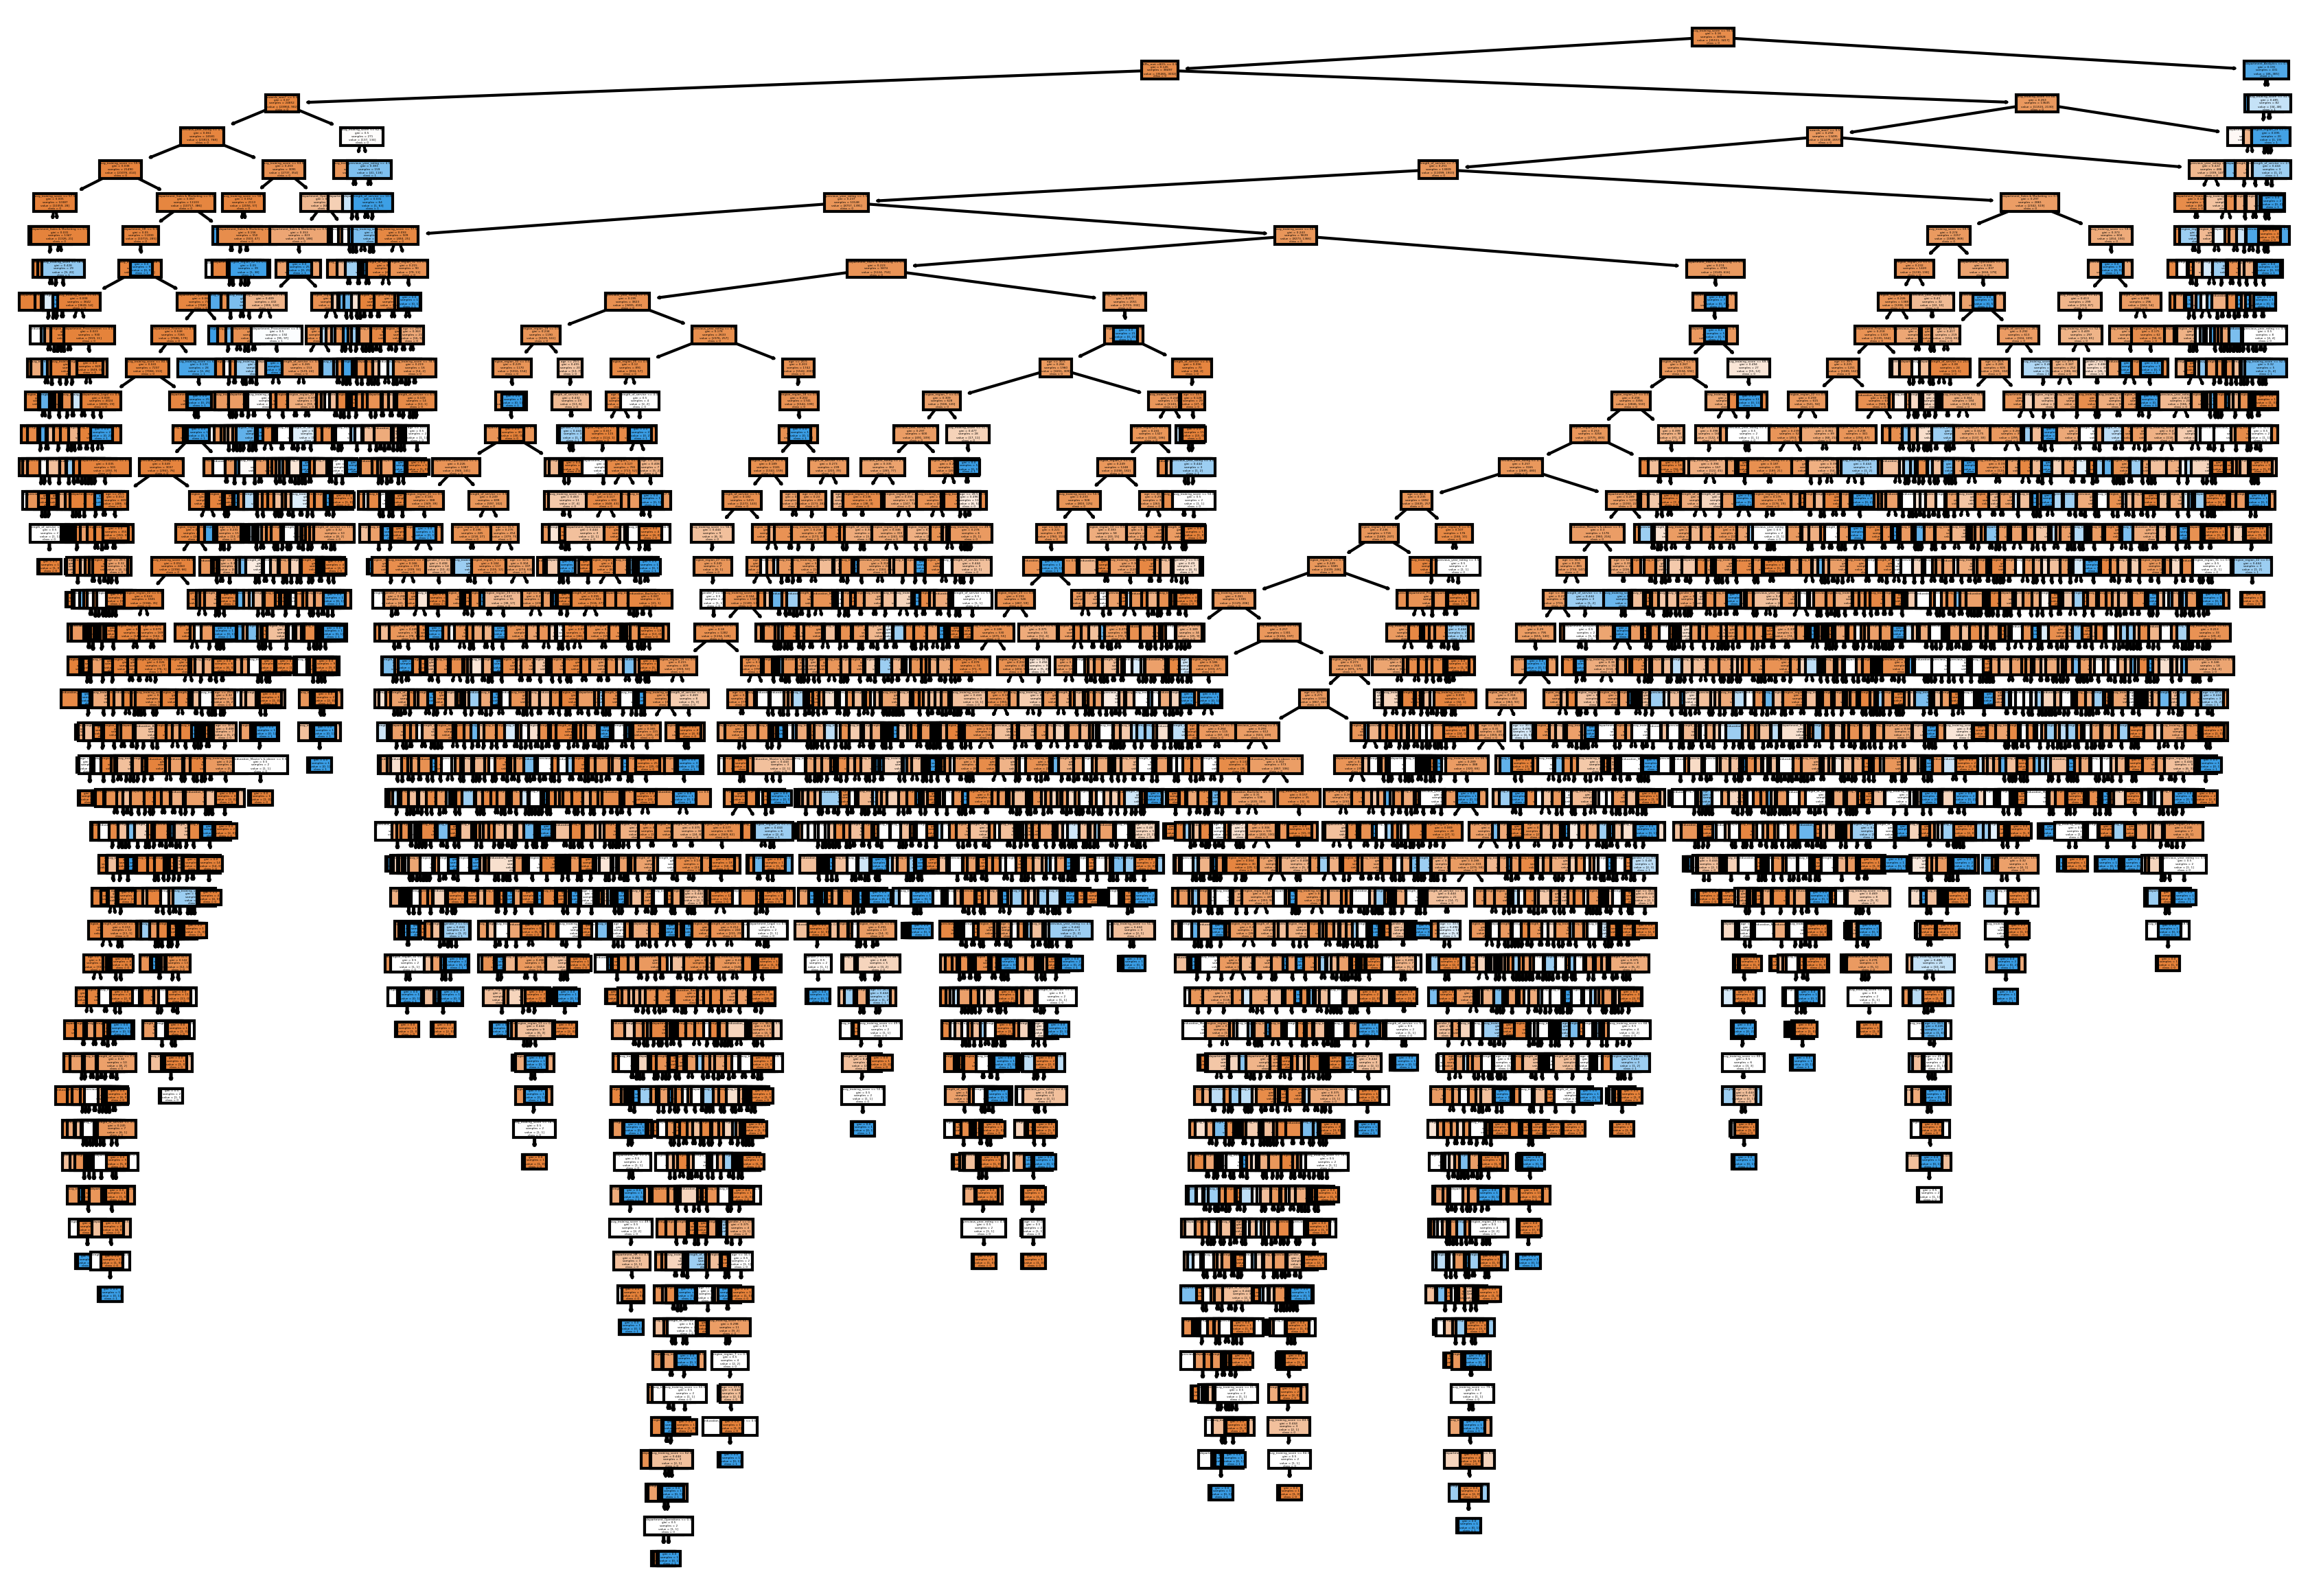

In [91]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14,10), dpi=300)
from sklearn import tree
tree.plot_tree(regressor,feature_names = fn, class_names=cn,filled = True);

To balance the data, we will do upsampling for [is_prmoted]=0

In [53]:
df_minority = dummy[dummy.is_promoted==1]
df_majority = dummy[dummy.is_promoted==0]
from sklearn.utils import resample


In [54]:
df_minority.head(4)

,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Master's & above,gender_f,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
11,35,5.0,3,1,0,50,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
39,33,5.0,6,1,0,51,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,50,4.0,17,1,0,47,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
69,30,3.0,7,1,0,84,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=15000,random_state=123) 


In [57]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [59]:
x=df_upsampled.drop(['is_promoted'],axis=1)
y=df_upsampled['is_promoted']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[8224,  568],
       [ 111, 2983]], dtype=int64)

In [60]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,  average='binary')
recall

0.9641241111829347

In [61]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average='binary')
precision

0.8400450577302169

In [62]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('Decision tree Model')
print(cm,score)

Decision tree Model
[[8224  568]
 [ 111 2983]] 0.8978179082016554


In [63]:
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegression
regressor_logi=LogisticRegression(random_state=0)
regressor_logi.fit(x_train,y_train)
y_pred=regressor_logi.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
score = f1_score(y_test, y_pred, average='binary')
print('logistics Model')
print(cm,score)

C:\Users\Finch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistics Model
[[7969  823]
 [1829 1265]] 0.48822848321111534


In [70]:
from sklearn.ensemble import RandomForestClassifier
regressor_forest=RandomForestClassifier(n_estimators=100,random_state=0)
regressor_forest.fit(x_train,y_train)
y_pred=regressor_forest.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
score = f1_score(y_test, y_pred, average='binary')
print('random forest tree Model')
print(cm,score)

random forest tree Model
[[8562  230]
 [ 119 2975]] 0.9445943800603271


In [67]:
from sklearn.neighbors import KNeighborsClassifier   
regressor_knn = KNeighborsClassifier(n_neighbors=1)
regressor_knn.fit(x_train,y_train)
y_pred=regressor_knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
score = f1_score(y_test, y_pred, average='binary')
print('knn for')
print(cm,score)

knn for
[[8192  600]
 [ 155 2939]] 0.8861751846826473
